# Loan Decision Modeling with Machine Learning and Data Analyitics
---

## Dataset: 

The practice test data can be found [here](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/download/test-file) and train data can be found [here](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/download/train-file).
The dataSet come from a practice Hackahon on the Analytics Vidhya website with a prompt of:

"Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers."


In [2]:
from importlib import import_module
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn as sk

___
## Initial Problem and Data Analysis:

Here we will get an initial look at the data and investigate the columns of data, the types of data they hold, the label data column for our data. By doing this we can see a data schema and table layout. Somethings to note about he data set is that the raw test data does not have a label column, which is added in the train data. The deliverable sample submission csv contains only the Loan_IDs and Decision Label Column, this is most likely all that the client would like and thus what we should aim to produce and a deliverable output. 

The deliverable data label is a binary decision/classification problem. In other words the Loan_Status Column can only have 1 of 2 possible outcomes, an approved or unapproved, yes or no, 1 or 0, value. We can use the training set to model our problem and then test these models using the test set.  

In [3]:
test_set = pd.read_csv('data/test_lAUu6dG.csv')
train_set = pd.read_csv('data/train_ctrUa4K.csv')
sample_set = pd.read_csv('data/sample_submission_49d68Cx.csv')

In [4]:
# Investigate Data
print(f"Test Data Shape: {test_set.shape}")
print(f"Train Data Shape: {train_set.shape}")
print(test_set.columns)
print(test_set.head())

Test Data Shape: (367, 12)
Train Data Shape: (614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             234

In [5]:
print(train_set.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
print(sample_set.columns)

Index(['Loan_ID', 'Loan_Status'], dtype='object')


___
## Data Pre-Processing and Cleaning

Here we can process and clean our data for more effective modeling and a easier work flow. 

1. Lets join our test and train data for processing and cleaning. This creates our Analytics Base Tables(ABT)
2. We handle null values and any strange data values we find.
3. We handle all of the string values in the the table, changing these to int allows use to use more models and will be useful if there are any performant models.

Doing this processing and cleaning is an important step that allows for the data to be used in a more effective manor.

### P1: (Table Join)

In [7]:
# Create ABT
df = pd.concat([test_set, train_set])

In [8]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### p2: (Null Value Handling)

In [9]:
# Null Value Handeling
for d in df:
    df[d] = df[d].fillna(df[d].dropna().mode()[0]) # Replace with mode since mean is not effective here

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                0.0       110.0             360.0   
1             3076             1500.0       126.0             360.0   
2             5000             1800.0       208.0             360.0   
3             2340             2546.0       100.0             360.0   
4             3276                0.0        78.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Urban           Y  
2             1.0   

### P3: (Handle String Values )

In [12]:
df.drop('Loan_ID', axis=1, inplace=True)

In [13]:
df['Property_Area'] = df['Property_Area'].map(
    {
    'Urban': 0,
    'Rural': 1,
    'Semiurban': 2
    }
).astype(int)


In [14]:
df['Dependents'] = df['Dependents'].map(
    {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3
    }
).astype(int)

In [15]:
df['Gender'] = df['Gender'].map(
    {
        'Male': 0,
        'Female': 1
    }
).astype(int)

In [16]:
df['Married'] = df['Married'].map(
    {
        'No': 0,
        'Yes': 1
    }
).astype(int)

In [17]:
df['Education'] = df['Education'].map(
    {
        'Not Graduate': 0,
        'Graduate': 1
    }
).astype(int)

In [18]:
df['Self_Employed'] = df['Self_Employed'].map(
    {
        'No': 0,
        'Yes': 1
    }
).astype(int)

In [19]:
df['Credit_History'] = df['Credit_History'].astype(int)

In [20]:
df['Loan_Status'] = df['Loan_Status'].map(
    {
        'N': 0,
        'Y': 1
    }
).astype(int)

In [21]:
print(df.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       0        1           0          1              0             5720   
1       0        1           1          1              0             3076   
2       0        1           2          1              0             5000   
3       0        1           2          1              0             2340   
4       0        0           0          0              0             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       110.0             360.0               1   
1             1500.0       126.0             360.0               1   
2             1800.0       208.0             360.0               1   
3             2546.0       100.0             360.0               1   
4                0.0        78.0             360.0               1   

   Property_Area  Loan_Status  
0              0            1  
1              0            1  
2              0    

## Exploritory Data Analysis and Visualizations:

Now that our data is mostly processed into a single joined Analytics Base Table, Processed, and Cleaned, we can look at the data in a more Exploritory Data Analysis(EDA) and begin Visualizing data to see if there are correlations we should investigate.
To begin the EDA on the ABT lets split our table back into test and train sets.
A Good split for this will be a 70:30 split for train and test.

In [22]:
split_point = int(df.shape[0]*.70)
train_set = df.iloc[:split_point]
test_set = df.iloc[split_point:]

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

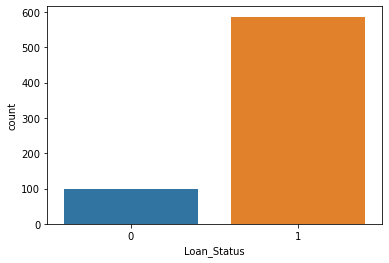

In [23]:
sb.countplot('Loan_Status', data=train_set)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

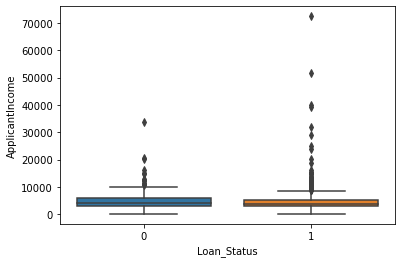

In [24]:
sb.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_set)

<AxesSubplot:>

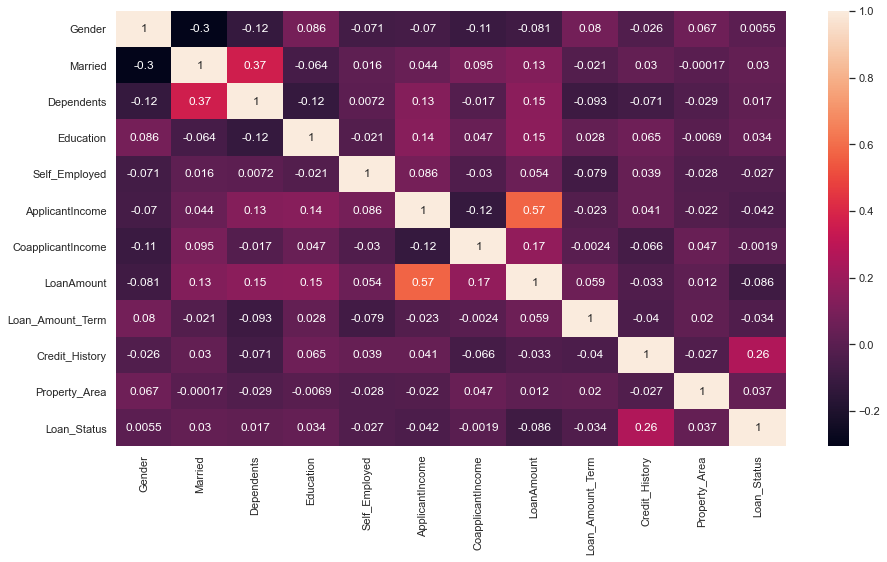

In [25]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.heatmap(train_set.corr(), annot=True)

## Modeling with Native Feautures:

Here we will implement some ML Algorithms to train and test our data with to see if there is a way we can accuractly and percisely make loan approve decisions on so we can help automate the process for Dream Housing Finance.

In [102]:
# import needed logistic regression modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [44]:
# generate train and validation sets 
x = train_set.drop('Loan_Status', axis=1)
y = train_set['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

### P1: (Logistic Regression)

Since our problem is a binarry classifier we can implement the logistic regression algorithm. 
This algorithm implements a sigmod function in tandum with the regression general purpose function to use logs to find a sigmod that fits our classification.

#### Base Model

In [45]:
# Base logistic regression
log_reg_model = LogisticRegression().fit(x_train,y_train)
log_reg_model.predict(x_train)
log_reg_model.score(x_test, y_test)

0.8446601941747572

Running the base logistic regression model we get about an 84% accuracy, which is not the best but maybe running with some different perameters we can improve this score.
So next we will re-run the model with investigating if we can improve it with some managed parameters.

#### Ajusted Optimization Model

In [97]:
del log_reg_model

In [101]:
# Ajusted logistic regression (Optimization)
log_reg_model = LogisticRegression(solver='saga').fit(x_train,y_train)
log_reg_model.predict(x_train)
print(f"Model score: {100 * log_reg_model.score(x_test, y_test)}%")

Model score: 86.89320388349515%


/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


This gives a few points of improvement on the model's score to approxamitly 87% when using the saga solver.
This is closer to something that we can use in a model, but still not quite high enough of a score to use for certain.
So with this being the best we can gain from this model, we can move to more complex models to see if there is any improvemnt on score.

### P2: (Suppport Vector Classification)

In our tool box the SVC is another good candidate for binary classification.
This algorithm implements hyperplanes to classify via feature selection.

In [103]:
# import needed SVC modules
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [143]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=1, probability=True, random_state=0))
clf.fit(x_train, y_train)
clf.predict(x_train)
print(f"Model score: {100 * clf.score(x_test, y_test)}%")

Model score: 86.89320388349515%


This model gives use around the same score, 87%, and thus if we were goin to implement for a decision based product, we would use the lower csot model.
But before we give up on increasing our accuracy score we should try a decision tree model as a last exploration to insure that this model is best for our purposes.

### P3: (Decision Tree)

In [144]:
# import needed Decision Tree modules
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [161]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
dtc = dtc.fit(x_train, y_train)
dtc.predict(x_train)
print(f"Model score: {100 * dtc.score(x_test, y_test)}%")

Model score: 87.37864077669903%


This model also gavea a similar score of 87%, but with a small increase. 
So if we aim to use the best performing model, this would be our model.
However, since this is more expensive to run, we should stick with logistic regression for scalable runtimes.

## Conclusion: